<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduciton to convolutional neural networks and computer vision with tensorflow

compputer vision is the pracitce of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

however we've modified it to only use two classes (pizza & steak) using image data modification notebook: extras/image_data_modification.ipynb

> We start with small dataset so we can experiment what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-11 13:16:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   293MB/s    in 0.4s    

2022-09-11 13:16:28 (293 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



 ## Inspect the data (become one with it)

 A very crucial step at the beginning of any machine learning project is becoming one with the data. And for a computer vision project... this usually means visualizing many samples of your data.




In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in '{dirpath}'.")


There are 2 directoris and 0 images in 'pizza_steak'.
There are 2 directoris and 0 images in 'pizza_steak/test'.
There are 0 directoris and 250 images in 'pizza_steak/test/steak'.
There are 0 directoris and 250 images in 'pizza_steak/test/pizza'.
There are 2 directoris and 0 images in 'pizza_steak/train'.
There are 0 directoris and 750 images in 'pizza_steak/train/steak'.
There are 0 directoris and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep 11 13:16 .
drwxr-xr-x 1 root root 4096 Sep 11 13:16 ..
drwxr-xr-x 4 root root 4096 Sep 11 13:16 test
drwxr-xr-x 4 root root 4096 Sep 11 13:16 train


In [ ]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
os.listdir("pizza_steak/train/steak")

['1539499.jpg',
 '732986.jpg',
 '2394465.jpg',
 '2403776.jpg',
 '97656.jpg',
 '377190.jpg',
 '1761285.jpg',
 '2614649.jpg',
 '2815172.jpg',
 '2826987.jpg',
 '2916448.jpg',
 '172936.jpg',
 '2425389.jpg',
 '482465.jpg',
 '1348047.jpg',
 '461187.jpg',
 '1984271.jpg',
 '359330.jpg',
 '3280453.jpg',
 '1241193.jpg',
 '1829045.jpg',
 '1090122.jpg',
 '3330642.jpg',
 '2625330.jpg',
 '37384.jpg',
 '493029.jpg',
 '3478318.jpg',
 '667075.jpg',
 '3671877.jpg',
 '2291292.jpg',
 '2544643.jpg',
 '167069.jpg',
 '1346387.jpg',
 '1212161.jpg',
 '735441.jpg',
 '393494.jpg',
 '3020591.jpg',
 '1987639.jpg',
 '465494.jpg',
 '421476.jpg',
 '3857508.jpg',
 '285045.jpg',
 '568972.jpg',
 '2287136.jpg',
 '296268.jpg',
 '3556871.jpg',
 '184226.jpg',
 '1290362.jpg',
 '2859933.jpg',
 '214320.jpg',
 '2711806.jpg',
 '213765.jpg',
 '134598.jpg',
 '3375959.jpg',
 '1548239.jpg',
 '233964.jpg',
 '1724717.jpg',
 '187521.jpg',
 '1849364.jpg',
 '2087958.jpg',
 '1021458.jpg',
 '3577618.jpg',
 '3727491.jpg',
 '1969596.jpg',
 '

To visualize our images, first let's get the class names programmatically.


In [ ]:
# Get the classanames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
sorted([item.name for item in data_dir.glob("*")])

['pizza', 'steak']

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images form here)
  target_folder = target_dir+ target_class
  print(target_folder)
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) 
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shaspe of the image
  return img





pizza_steak/train/pizza
['242813.jpg']
Image shape: (512, 383, 3)


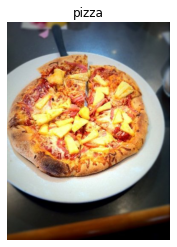

In [ ]:
# View a random image from the trianing dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

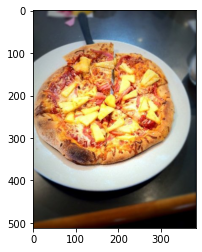

In [ ]:
plt.imshow(img)

In [ ]:

img.dtype

dtype('uint8')

In [ ]:
img

array([[[42, 45, 50],
        [42, 45, 50],
        [43, 46, 51],
        ...,
        [27, 25, 26],
        [24, 20, 21],
        [21, 17, 18]],

       [[42, 45, 50],
        [43, 46, 51],
        [43, 46, 51],
        ...,
        [28, 26, 27],
        [22, 20, 21],
        [21, 17, 18]],

       [[43, 46, 51],
        [43, 46, 51],
        [44, 47, 52],
        ...,
        [29, 27, 28],
        [23, 21, 22],
        [20, 18, 19]],

       ...,

       [[89, 40,  0],
        [89, 40,  0],
        [90, 41,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 37,  0],
        [90, 38,  0],
        [90, 38,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 36,  0],
        [89, 37,  0],
        [89, 37,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 383, 3), dtype=uint8, numpy=
array([[[42, 45, 50],
        [42, 45, 50],
        [43, 46, 51],
        ...,
        [27, 25, 26],
        [24, 20, 21],
        [21, 17, 18]],

       [[42, 45, 50],
        [43, 46, 51],
        [43, 46, 51],
        ...,
        [28, 26, 27],
        [22, 20, 21],
        [21, 17, 18]],

       [[43, 46, 51],
        [43, 46, 51],
        [44, 47, 52],
        ...,
        [29, 27, 28],
        [23, 21, 22],
        [20, 18, 19]],

       ...,

       [[89, 40,  0],
        [89, 40,  0],
        [90, 41,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 37,  0],
        [90, 38,  0],
        [90, 38,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[89, 36,  0],
        [89, 37,  0],
        [89, 37,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)>

In [ ]:
# view the image shape
img.shape # returns width, height, colour channels

(512, 383, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.16470588, 0.17647059, 0.19607843],
        [0.16470588, 0.17647059, 0.19607843],
        [0.16862745, 0.18039216, 0.2       ],
        ...,
        [0.10588235, 0.09803922, 0.10196078],
        [0.09411765, 0.07843137, 0.08235294],
        [0.08235294, 0.06666667, 0.07058824]],

       [[0.16470588, 0.17647059, 0.19607843],
        [0.16862745, 0.18039216, 0.2       ],
        [0.16862745, 0.18039216, 0.2       ],
        ...,
        [0.10980392, 0.10196078, 0.10588235],
        [0.08627451, 0.07843137, 0.08235294],
        [0.08235294, 0.06666667, 0.07058824]],

       [[0.16862745, 0.18039216, 0.2       ],
        [0.16862745, 0.18039216, 0.2       ],
        [0.17254902, 0.18431373, 0.20392157],
        ...,
        [0.11372549, 0.10588235, 0.10980392],
        [0.09019608, 0.08235294, 0.08627451],
        [0.07843137, 0.07058824, 0.0745098 ]],

       ...,

       [[0.34901961, 0.15686275, 0.        ],
        [0.34901961, 0.15686275, 0.        ],
        [0.35294118, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing the data (get all  of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 213ms/step - loss: 0.5851 - accuracy: 0.6707 - val_loss: 0.3953 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4235 - accuracy: 0.8080 - val_loss: 0.3490 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3915 - accuracy: 0.8233 - val_loss: 0.4198 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3743 - accuracy: 0.8340 - val_loss: 0.3863 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3395 - accuracy: 0.8687 - val_loss: 0.3214 - val_accuracy: 0.8560


## Using the ssame model as before

Lets replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.09362&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

# Complie the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.5536 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Depite having 20x more parameters than our CNN (model_1), model_2 perdorms terribly.. let't try to improve it

In [ ]:
# SEt random seed
tf.random.set_seed(42)

# Create the model (same as above let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 4.9712 - accuracy: 0.6147 - val_loss: 1.3962 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.8007 - accuracy: 0.7293 - val_loss: 0.6041 - val_accuracy: 0.7220
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.9316 - accuracy: 0.7240 - val_loss: 0.5181 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.9172 - accuracy: 0.7213 - val_loss: 0.7333 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.7049 - accuracy: 0.7547 - val_loss: 1.0215 - val_accuracy: 0.6620


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down.

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here was scalling/ normaililzing)
3. Created a model (start with a basaline).
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment, experiment, experiment)


### 1. Become one with the data

pizza_steak/train/steak
['2965021.jpg']
Image shape: (512, 512, 3)
pizza_steak/train/pizza
['1326065.jpg']
Image shape: (512, 512, 3)


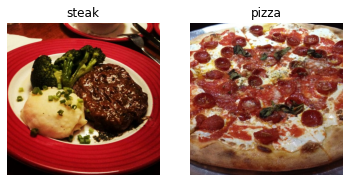

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all -10,000 images at one time, a model only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 imaeges (or more) might not fit into the memor of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
because 32 is good for your health...

In [ ]:
!nvidia-smi

Sun Sep 11 13:19:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    28W /  70W |   2860MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create and test data generatioin and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing resutl that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost infinite amount of architecture 

In [ ]:
# Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid", # if "same" output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify the input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification as only 1 output neuron)
])



In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model


In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # It is combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.0679 - accuracy: 0.6200 - val_loss: 0.5267 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4903 - accuracy: 0.7827 - val_loss: 0.4184 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3923 - accuracy: 0.8340 - val_loss: 0.4124 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3004 - accuracy: 0.8853 - val_loss: 0.4208 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.1918 - accuracy: 0.9387 - val_loss: 0.4224 - val_accuracy: 0.8120


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.3214 - accuracy: 0.8560


[0.3214341998100281, 0.8560000061988831]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model
It looks like our model is learning something, let's evaluate it


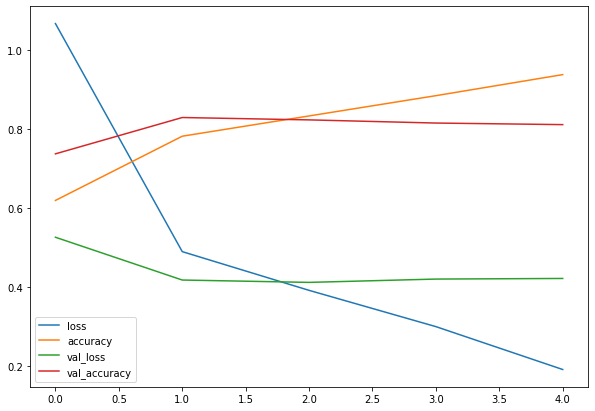

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# PLot the validation and training plot seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation  metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we ran for 

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel(" epochs")
  plt.legend()

**NOte:** When a model's **validation starts to increase**, it's likely that the model is **overfitting** the training datset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

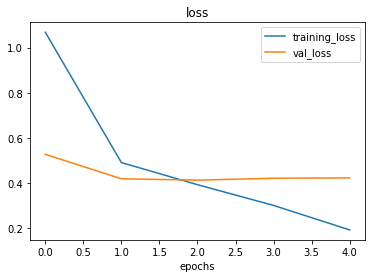

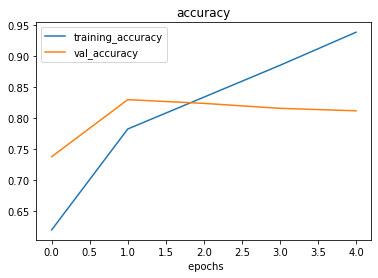

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 same
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv learning
* Increase the number of conv filter
* Add another dense layers to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)

> **Note:** Reducing overfitting is also known as *regularization*

In [ ]:
# Create the model( this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

** if conv layers finds features in an image, maxpool finds the most important parts of those features

In [ ]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.6060 - accuracy: 0.6913 - val_loss: 0.4574 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4681 - accuracy: 0.7880 - val_loss: 0.3950 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4378 - accuracy: 0.7980 - val_loss: 0.3862 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4109 - accuracy: 0.8293 - val_loss: 0.3471 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3756 - accuracy: 0.8447 - val_loss: 0.3323 - val_accuracy: 0.8480


In [ ]:
# Get a summary of our model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


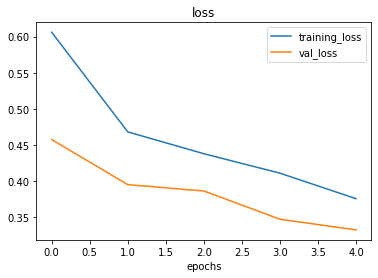

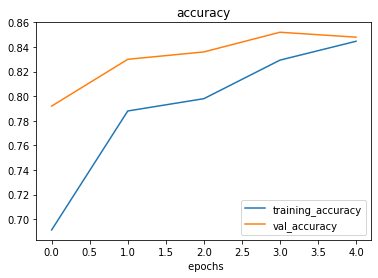

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how do you want to rotate an image?
                                             shear_range=0.9, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in on an image randomly
                                             width_shift_range=0.2, # move your image around on the y-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


**QuestionL** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an Image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [ ]:
# Import data and Augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non-augmented test data batches
print("Non-Augmented test data batches:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data batches:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameter our images a left as they are i the directories bur are modified as they're loaded into the model.

finally ... let's visuallize some augmented data.

In [ ]:
# Get image data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels don't get augmented

showing image number: 0


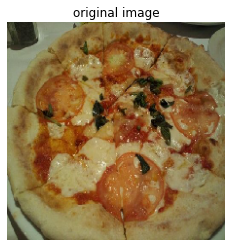

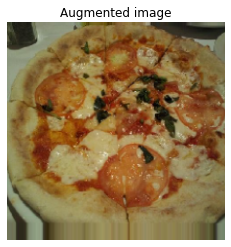

In [ ]:
# show the original image and the augmented image
import random
random_number = random.randint(0, 31) # our batch batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6994 - accuracy: 0.4313 - val_loss: 0.6925 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6944 - accuracy: 0.5567 - val_loss: 0.6904 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6878 - accuracy: 0.5887 - val_loss: 0.6637 - val_accuracy: 0.5860
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6759 - accuracy: 0.5513 - val_loss: 0.6445 - val_accuracy: 0.6920
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6530 - accuracy: 0.5980 - val_loss: 0.6167 - val_accuracy: 0.7000


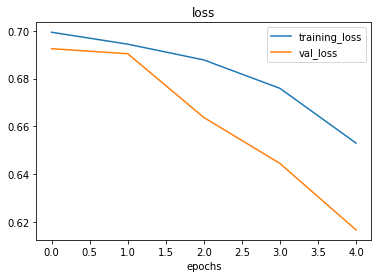

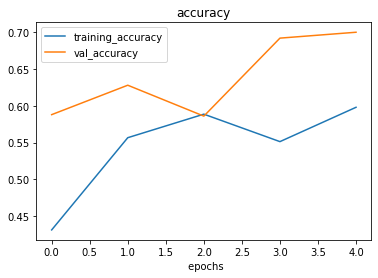

In [ ]:
# Create our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
   
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6771 - accuracy: 0.5647 - val_loss: 0.5401 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5586 - accuracy: 0.7113 - val_loss: 0.3975 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5134 - accuracy: 0.7593 - val_loss: 0.4354 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4983 - accuracy: 0.7667 - val_loss: 0.4129 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4823 - accuracy: 0.7767 - val_loss: 0.3506 - val_accuracy: 0.8520


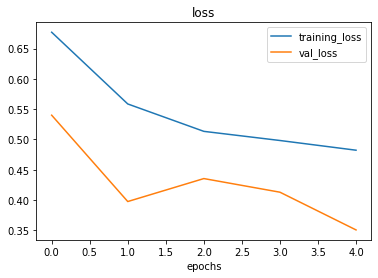

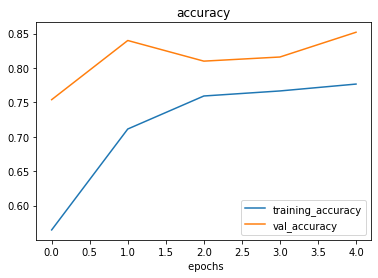

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer
(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learining rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> **Practice** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled data.


## Making a prediction with our trianed model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-09-11 13:24:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-09-11 13:24:32 (224 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



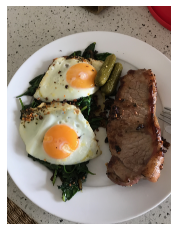

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make precition on your own custom data, it's important that your data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
#@title Default title text
# Create a function to import  an image and resize it to be  able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,
  img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
steak = tf.expand_dims(steak, axis=0)
pred = model_7.predict(steak)
pred

array([[0.88309485]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability. wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at a filename, makes a prediction with model and
  plots the image with the predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a preidiction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

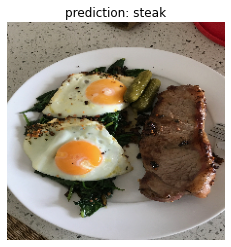

In [ ]:
# Test our model on a custrom image
pred_and_plot(model_7, "/content/03-steak.jpeg")

--2022-09-11 13:24:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-09-11 13:24:36 (210 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



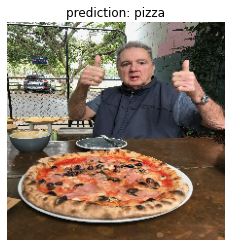

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

our model works! let's try it on another image.. this time pizza

In [ ]:
# Downlaod another test custom image and make a prediction on it
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg


--2022-09-11 13:24:36--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1     [ <=>                ] 145.52K  --.-KB/s    in 0.008s  

2022-09-11 13:24:37 (18.5 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [149011]



# Multi-class image classification

we've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied



1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-11 13:24:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   281MB/s    in 1.8s    

2022-09-11 13:24:39 (281 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 0 images in '10_food_classes_all_data'.
There are 0 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names  = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


10_food_classes_all_data/train/hamburger
['825337.jpg']
Image shape: (383, 512, 3)


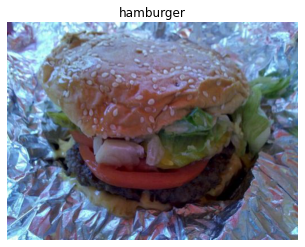

In [ ]:
# Visualize , visualize , visulaize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


In [ ]:
random.choice(class_names)

'grilled_salmon'

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from direcotories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website..how about we take their model and use it for our problem?


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # change to have 10 output neurons and use the softmax activation function
])

# compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model


In [ ]:
# fit the model
history_8 = model_8.fit(train_data, #mow 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1609 - accuracy: 0.1959 - val_loss: 1.9967 - val_accuracy: 0.2832
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.9121 - accuracy: 0.3316 - val_loss: 1.8831 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.6273 - accuracy: 0.4539 - val_loss: 1.9167 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 1.1333 - accuracy: 0.6295 - val_loss: 2.1168 - val_accuracy: 0.3140
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.5768 - accuracy: 0.8155 - val_loss: 2.7846 - val_accuracy: 0.3056


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 2.7846 - accuracy: 0.3056


[2.7846426963806152, 0.30559998750686646]

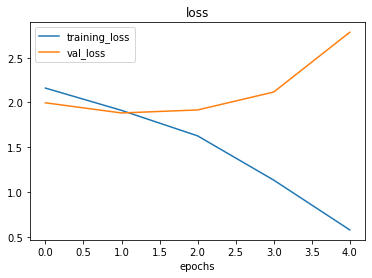

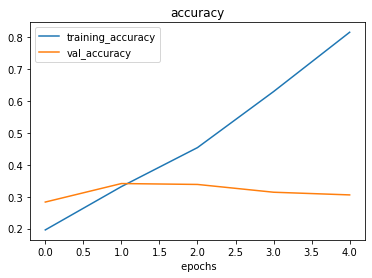

In [ ]:
# Check out the  model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well ... it seems our model is **overfitting** the training set quite badly.. in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameter (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something... 

However, it's not generalizing well to unseen data (overfitting)..

So, let's try and fix overfitting by..

* **Get more data**- having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - If our current is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation**= data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset


In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers..

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]) 


In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 180ms/step - loss: 2.4079 - accuracy: 0.2207 - val_loss: 1.9445 - val_accuracy: 0.3044
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8274 - accuracy: 0.3684 - val_loss: 1.8900 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.5308 - accuracy: 0.4893 - val_loss: 1.9668 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.1333 - accuracy: 0.6369 - val_loss: 2.1240 - val_accuracy: 0.3248
Epoch 5/5
235/235 [==============================] - 42s 178ms/step - loss: 0.7429 - accuracy: 0.7685 - val_loss: 2.5558 - val_accuracy: 0.2944


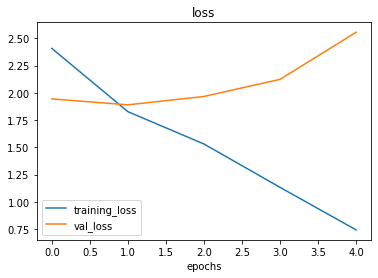

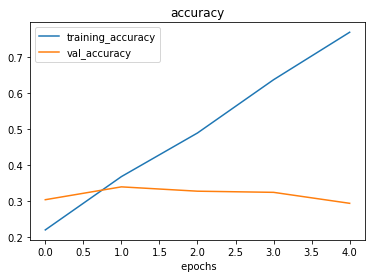

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like  our "simplifying the model" experiment didn't work.. the accuracy went down and overfitting continued..
How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 134s 567ms/step - loss: 2.1817 - accuracy: 0.2024 - val_loss: 2.0835 - val_accuracy: 0.2304
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0569 - accuracy: 0.2688 - val_loss: 2.0179 - val_accuracy: 0.2912
Epoch 3/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0145 - accuracy: 0.2845 - val_loss: 1.9345 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 108s 459ms/step - loss: 1.9819 - accuracy: 0.3025 - val_loss: 1.9051 - val_accuracy: 0.3308
Epoch 5/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9428 - accuracy: 0.3263 - val_loss: 1.8493 - val_accuracy: 0.3504


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 2.7846 - accuracy: 0.3056


[2.7846429347991943, 0.30559998750686646]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.8493 - accuracy: 0.3504


[1.8492786884307861, 0.35040000081062317]

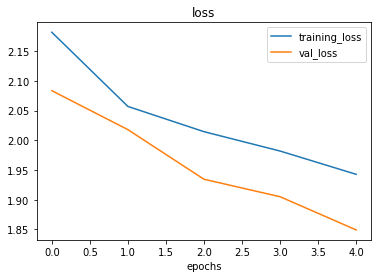

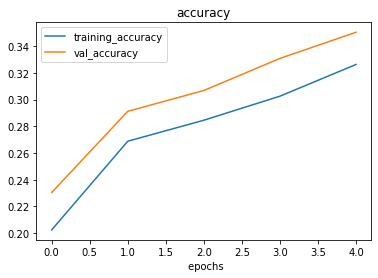

In [ ]:
# Chcek out our model trained on augmented data's loss curve
plot_loss_curves(history_10)

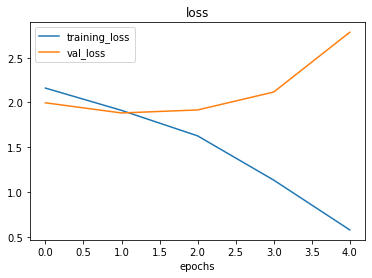

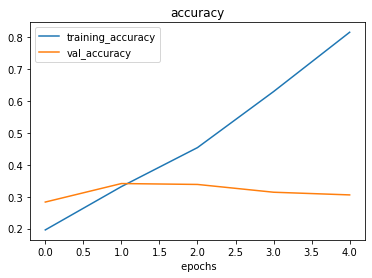

In [ ]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the righ direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvement.

In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together  and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
restructuring our model's architecture (increasing layers/ hidden  units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try `tranfer learning`


### Making a prediction with our trained model

let's use our model to make preictions on ou own custom images!


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-09-11 14:19:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-09-11 14:19:50 (206 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2022-09-11 14:19:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at a filename, makes a prediction with model and
  plots the image with the predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a preidiction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

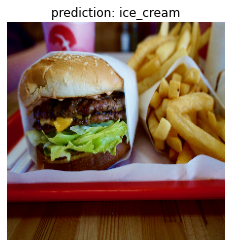

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

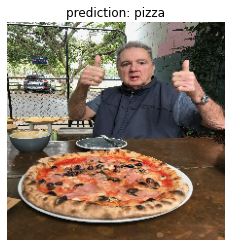

In [ ]:
# good news: our updated pred_and_plot function works for binary classification too....
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-pizza-dad.jpeg",
              class_names=["pizza", "steak"])

Looks like our mode didn't perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

# Saving and loading our model


In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 1.8493 - accuracy: 0.3504


[1.8492785692214966, 0.35040000081062317]

In [ ]:
# Compare our loadeded model with our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 1.8493 - accuracy: 0.3504


[1.8492786884307861, 0.35040000081062317]